<a href="https://colab.research.google.com/github/Tawanss/text-analytic-/blob/main/Copy_of_Project1_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="300">

## Due Date: Sunday, October 1, 2023
<br>
<span style="color:red">NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!</span>

## List team members:

1. Tawan       643020501-6 Tawan.b@kkumail.com
2. Punnita Thongbor    643020508-2 Punnita.t@kkumail.com
3. Puttipong   643021268-1 Puttipongyy@kkumail.com
4. Satawat     643021273-8 Satawat.m@kkumail.com
5. Jindaporn Phopomee  643021262-3 Jindaporn.p@kkumail.com

3

**NOTE1**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost

**NOTE2**: Create a slide presentation once finished, convert to pdf format, and turn in by one group member only
<br>A list of documents to turn in: 1) Jupyter notebook containing results and 2) A set of slides in pdf format

In [1]:
# Load these libraries
import json
import pprint
import pandas as pd
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file

We are working with a Twitter dataset in JSON format from `thailand_tweets.txt`.<br>
The tweets were scraped using "Thailand" keyword on August 31, 2022.<br>
We are going to examine the dataset and retrieve information from the JSON file.
Most Twitter datasets provide only Tweet ID where we can retrieve tweets from tweet ID as follow.
```
twitter.com/anyuser/status/<tweet_id>
```

#### Read JSON file

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# read the file
file = open('/content/drive/MyDrive/DataForBig/thailand_tweets.txt','r') # rename
foo = file.read()
d = json.loads(foo)


In [ ]:
thailand_json = json.loads(d)
thailand_json

{'1564764893038882816': {'tweet_id': '1564764893038882816',
  'username': 'matthunter',
  'name': 'MATT HUNTΞR',
  'profile_picture': 'https://twitter.com/matthunter/photo',
  'replies': 2,
  'retweets': 1,
  'likes': 7,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:57+00:00',
  'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
  'hashtags': [],
  'mentions': [],
  'images': [],
  'videos': [],
  'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
  'link': ''},
 '1564764866598080513': {'tweet_id': '1564764866598080513',
  'username': 'DavSmithVP',
  'name': 'DavSmith / Virtual Photography',
  'profile_picture': 'https://twitter.com/DavSmithVP/photo',
  'replies': 0,
  'retweets': 0,
  'likes': 2,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:50+00:00',
  'content': 'Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics',
  'hashtags': ['Virtua

In [ ]:
# inspect the file
thailand_json

{'1564764893038882816': {'tweet_id': '1564764893038882816',
  'username': 'matthunter',
  'name': 'MATT HUNTΞR',
  'profile_picture': 'https://twitter.com/matthunter/photo',
  'replies': 2,
  'retweets': 1,
  'likes': 7,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:57+00:00',
  'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
  'hashtags': [],
  'mentions': [],
  'images': [],
  'videos': [],
  'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
  'link': ''},
 '1564764866598080513': {'tweet_id': '1564764866598080513',
  'username': 'DavSmithVP',
  'name': 'DavSmith / Virtual Photography',
  'profile_picture': 'https://twitter.com/DavSmithVP/photo',
  'replies': 0,
  'retweets': 0,
  'likes': 2,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:50+00:00',
  'content': 'Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics',
  'hashtags': ['Virtua

#### Pretty print json/dict object

In [ ]:
import pprint
pprint.pprint(thailand_json)

{'1564761905410875392': {'content': 'Tinggal cari duitnya aja ini mah kalo di '
                                    'Thailand bisa pake Qris',
                         'hashtags': [],
                         'images': [],
                         'is_retweet': False,
                         'likes': 0,
                         'link': '',
                         'mentions': [],
                         'name': '',
                         'posted_time': '2022-08-30T23:48:04+00:00',
                         'profile_picture': 'https://twitter.com/moanfIeur/photo',
                         'replies': 0,
                         'retweets': 0,
                         'tweet_id': '1564761905410875392',
                         'tweet_url': 'https://twitter.com/moanfIeur/status/1564761905410875392',
                         'username': 'moanfIeur',
                         'videos': []},
 '1564761944061382656': {'content': 'Padahal berharap pertama lawan Thailand '
                     

ทดสอบอื่นๆ

In [ ]:
thailand_json.keys()

dict_keys(['1564764893038882816', '1564764866598080513', '1564764845685280772', '1564764710804897792', '1564764468277612549', '1564764445825458181', '1564764361742110720', '1564764274098323456', '1564764028014313472', '1564763907700531202', '1564763775403712513', '1564763746463105026', '1564763729967054848', '1564763679232405504', '1564763673662464003', '1564763553130655744', '1564763407818952705', '1564763389058027521', '1564763303989366784', '1564763292354355200', '1564763185244426240', '1564763141589897217', '1564763050477244417', '1564762341324992513', '1564762335192940544', '1564762170277052418', '1564762027507458049', '1564761944061382656', '1564761905410875392'])

In [ ]:
first_key = list(thailand_json.keys())[0]
thailand_json[first_key]

{'tweet_id': '1564764893038882816',
 'username': 'matthunter',
 'name': 'MATT HUNTΞR',
 'profile_picture': 'https://twitter.com/matthunter/photo',
 'replies': 2,
 'retweets': 1,
 'likes': 7,
 'is_retweet': False,
 'posted_time': '2022-08-30T23:59:57+00:00',
 'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
 'hashtags': [],
 'mentions': [],
 'images': [],
 'videos': [],
 'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
 'link': ''}

Possible approaches:
* In fact, `pandas` has `pandas.read_json(<file_dir>)` function to read json file into dataframe
* As we create a data dict, we can also read our data dict into a pandas dataframe

In [ ]:
import pandas as pd
from io import StringIO

In [ ]:
thailand_df = pd.read_json(StringIO(d), orient='index')

In [ ]:
thailand_df

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,
2019-08-02 16:47:25.825458181,1564764445825458176,OhmPawatInter,OhmPawat International,https://twitter.com/OhmPawatInter/photo,0,99,143,False,2022-08-30 23:58:10+00:00,Trend twitter update \n\nTop Twitter influence...,"[4, ohmpawat, ย]",[ohmpawatt],[https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?f...,[],https://twitter.com/OhmPawatInter/status/15647...,
2019-08-02 16:46:01.742110720,1564764361742110720,nato_tonyo11,nutri(BUSY SI ENGR.)| SoliD,https://twitter.com/nato_tonyo11/photo,0,2,18,False,2022-08-30 23:57:50+00:00,Good morning world! And goodmorning to you to...,[DonnyPangilinan],[],[],[],https://twitter.com/nato_tonyo11/status/156476...,
2019-08-02 16:44:34.098323456,1564764274098323456,ThThitikarn61,thiti,https://twitter.com/ThThitikarn61/photo,0,0,0,False,2022-08-30 23:57:29+00:00,Listening to #faraway the title track of #theo...,"[faraway, theotherside, MarkTuan]",[marktuan],[],[],https://twitter.com/ThThitikarn61/status/15647...,
2019-08-02 16:40:28.014313472,1564764028014313472,Livetradingnews,Knightly News,https://twitter.com/Livetradingnews/photo,0,2,3,False,2022-08-30 23:56:30+00:00,With the recent news of the SCB X-Bitkub deal ...,[],[],[],[],https://twitter.com/Livetradingnews/status/156...,
2019-08-02 16:38:27.700531202,1564763907700531200,DiscoverSoc,Discover Society,https://twitter.com/DiscoverSoc/photo,0,1,0,False,2022-08-30 23:56:02+00:00,#ICYMI On the Frontline. Crude Power in Thail...,[ICYMI],[],[],[],https://twitter.com/DiscoverSoc/status/1564763...,https://t.co/OYQzv4BSm9


### Your report
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
    * You are free to define your own popularity metric
* Display the top 5 tweets that are the most popular among your collection
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [ ]:
# ----------------- Your code here -----------------



In [ ]:
th_df = thailand_df.set_index([pd.Index(range(29))])

In [ ]:
th_df

* The total number of tweets collected in the file:

In [ ]:
thailand_df.shape

(29, 16)

* The content of the first tweet:

In [ ]:
content = th_df.iloc[:1, 9:10]

In [ ]:
print(content.loc[0, 'content'])

Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 


In [ ]:
thailand_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2019-08-02 16:54:53.038882816 to 2019-08-02 16:05:05.410875392
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         29 non-null     int64              
 1   username         29 non-null     object             
 2   name             29 non-null     object             
 3   profile_picture  29 non-null     object             
 4   replies          29 non-null     int64              
 5   retweets         29 non-null     int64              
 6   likes            29 non-null     int64              
 7   is_retweet       29 non-null     bool               
 8   posted_time      29 non-null     datetime64[ns, UTC]
 9   content          29 non-null     object             
 10  hashtags         29 non-null     object             
 11  mentions         29 non-null     object             
 12  images           29 no

* Is the first tweet contained any hashtags or mentions?

In [ ]:
ht_mt = th_df.iloc[:2, 10:12]

In [ ]:
print(ht_mt.loc[1][:2])

hashtags             [VirtualPhotography]
mentions    [tombraider, crystaldynamics]
Name: 1, dtype: object


* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
    * You are free to define your own popularity metric

* Display the top 5 tweets that are the most popular among your collection

* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [ ]:
contents = " ".join([thailand_json[key]['content'] for key in thailand_json.keys()])
print(contents)

Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand.  Tomb Raider Underworld | Thailand 
#VirtualPhotography 
@tombraider
 @crystaldynamics The latest The Pattaya Daily! http://thepattayadaily.com Thanks to 
@PopeKael
 @ASEANNOWTH
 #thailand #pattaya You can live some places for next to nothing, believe it or not. I pay $300 a month for a really nice apartment in Thailand. All utilities included. No deposit. Close to the beach. Live music clubs everywhere. Meals are about $2 ALIEN HOUSE is a story of love, hope and alien intervention set in Wales, Thailand and Inner Space. It's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. William is not sure if he's going mad https://smarturl.it/alien-house-eng?IQid=jbmegan… Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 top tweets
25182 retweets

https://etrenders.com/trendsetters/

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(contents)
wordcloud

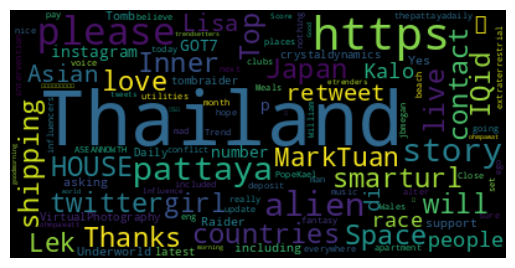

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Note: ไม่ต้องรายงานส่วนนี้ในสไลด์

## Problem 2 Study Trip Advisor Hotel Reviews Sentiment

We are working with the Trip Advisor Hotel Reviews dataset. You can see the source from https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews.

* Analyze the data to find out what make a hotel good or bad
<br>You may create a tag of "positive", "negative", or "neural" sentiment first. After tagging each tweet with different sentiment, we can separate positive tweets and negative tweets. Then, it is easier to find our common patterns in positive tweets or good hotels, and vice versa.

In [ ]:
#----------------------------------------------
# Your code starts here
# label each tweet as positive, negative, and neural sentiment
# combine tweet texts in each type
# tokenize texts
# convert to lower case
# remove stop words
# remove any other stop words, like RT
# remove punctuations
# remove other symbols?
# analyze word frequency in each sentiment type and so on
# create some data visualization for the analysis and your presentation





### Report
* How did you analyze the data?
* What did you find in the data? (please include figures or tables in the report, but no source code)

## Problem 3 Collect and Analyze Your Interesting Topic

* Select a topic that your group members are interested
* Gather url from at least 3 webpages
* Use urllib.request to retrieve data from webpage
* Clean and find intersting patterns and information
* Create a word cloud of your topic

In [ ]:
#----------------------------------------------
# Your code starts here




### Report
* What did you find out about your topic? (please include figures or tables in the report, but no source code)

# ☃️ The End of Project 1 ☃️